In [78]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['googleplaystore_user_reviews.csv', 'license.txt', 'googleplaystore.csv']


In [79]:
import seaborn as sns
import matplotlib.pyplot as plt


In [80]:
gps_df=pd.read_csv('../input/googleplaystore.csv')

# **Cleaning the Dataset**

In [81]:
gps_df.shape

(10841, 13)

**Finding missing values in the data**



In [82]:
gps_df.isnull().any()

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

In [83]:
#Deleting Null rows from Rating, Type, Content Rating (Leaving Current Ver and Android ver as right now 
#we are not using these columns for any prediction)

gps_df.dropna(subset=['Rating','Type','Content Rating'], inplace=True)


In [84]:
gps_df.shape

(9366, 13)

In [85]:
gps_df.describe()


,Rating
count,9366.000000
mean,4.191757
std,0.515219
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


Rating mean is quite high.

In [86]:
gps_df.sample(7)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7146,Antenna Tool,TOOLS,4.2,522,2.9M,"50,000+",Free,0,Everyone,Tools,"October 26, 2017",2.2 Free,4.0.3 and up
4266,Harris J Lyrics,FAMILY,4.7,36,7.1M,"1,000+",Free,0,Everyone,Entertainment,"March 12, 2018",1.3,4.0.3 and up
5447,Body scanner (prank),FAMILY,3.3,16063,3.8M,"1,000,000+",Free,0,Teen,Casual,"June 2, 2016",3.0,2.3 and up
10738,Race Manager FP,GAME,3.8,196,11M,"5,000+",Free,0,Everyone,Racing,"November 3, 2014",2.1,2.2 and up
8812,DS cloud,TOOLS,3.2,4908,38M,"500,000+",Free,0,Everyone,Tools,"May 23, 2018",2.8.0,4.0 and up
9848,Learn Italian with MosaLingua,FAMILY,4.7,1719,Varies with device,"50,000+",Paid,$4.99,Teen,Education,"May 31, 2018",Varies with device,Varies with device
9089,DYPSOET,FAMILY,5.0,8,7.4M,50+,Free,0,Everyone,Education,"August 7, 2018",1.0.2,4.1 and up


In [87]:
gps_df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [88]:
gps_df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

We see that the Price column contains '$' sign ,the Size column contains 'M','k' signs, Installs contain ',' and '+' signs. Taking care of all these.


In [89]:
#REplace $ by a '' and 'M' also by a ''
gps_df['Price'].replace(to_replace=r'[\$]',value='',regex=True, inplace=True)


#gps_df.sort_values('Price', ascending=False)

In [90]:
gps_df['Size'].replace(to_replace='Varies with device',value=np.nan,inplace=True)

In [91]:
#gps_df['Size'].replace(to_replace=r'[\\Mk]',value='',regex=True).apply(lambda x: float(x)*1000000),regex=True)
gps_df_extracted=gps_df['Size'].str.extract(r'(\d?.\d?)([\\Mk])')

In [92]:
gps_df_extracted=gps_df_extracted.replace(to_replace=['k','M'],value=[1000,1000000]).astype(float)

In [93]:
gps_df_extracted

,0,1
0,19.0,1000000.0
1,14.0,1000000.0
2,8.7,1000000.0
3,25.0,1000000.0
4,2.8,1000000.0
5,5.6,1000000.0
6,19.0,1000000.0
7,29.0,1000000.0
8,33.0,1000000.0
9,3.1,1000000.0


In [94]:
gps_df['Size']=gps_df_extracted[0]*gps_df_extracted[1]

In [95]:
gps_df['Size'].unique

<bound method Series.unique of 0        19000000.0
1        14000000.0
2         8700000.0
3        25000000.0
4         2800000.0
5         5600000.0
6        19000000.0
7        29000000.0
8        33000000.0
9         3100000.0
10       28000000.0
11       12000000.0
12       20000000.0
13       21000000.0
14       37000000.0
15        2700000.0
16        5500000.0
17       17000000.0
18       39000000.0
19       31000000.0
20       14000000.0
21       12000000.0
22        4200000.0
24       23000000.0
25        6000000.0
26       25000000.0
27        6100000.0
28        4600000.0
29        4200000.0
30        9200000.0
            ...    
10795     4000000.0
10796     7800000.0
10797    46000000.0
10799     6800000.0
10800    12000000.0
10801    19000000.0
10802    28000000.0
10803    81000000.0
10804    17000000.0
10805    15000000.0
10809    24000000.0
10810    21000000.0
10812    13000000.0
10814    31000000.0
10815     4900000.0
10817     8000000.0
10819     3600000.0
10820    

WE can replace the 'NaN' of "varies with device" in size with mean of its category.


In [96]:
gps_df[gps_df['Size'].isnull()].shape

(1637, 13)

In [97]:
gps_df.groupby('Category').Size.mean()

Category
ART_AND_DESIGN         1.276610e+07
AUTO_AND_VEHICLES      2.154129e+07
BEAUTY                 1.551351e+07
BOOKS_AND_REFERENCE    1.438625e+07
BUSINESS               1.491172e+07
COMICS                 1.315822e+07
COMMUNICATION          1.245831e+07
DATING                 1.831272e+07
EDUCATION              2.076165e+07
ENTERTAINMENT          2.185333e+07
EVENTS                 1.443247e+07
FAMILY                 3.015282e+07
FINANCE                1.859312e+07
FOOD_AND_DRINK         2.416310e+07
GAME                   4.534061e+07
HEALTH_AND_FITNESS     2.423771e+07
HOUSE_AND_HOME         1.750536e+07
LIBRARIES_AND_DEMO     1.249662e+07
LIFESTYLE              1.533544e+07
MAPS_AND_NAVIGATION    1.744884e+07
MEDICAL                1.938396e+07
NEWS_AND_MAGAZINES     1.312786e+07
PARENTING              2.157955e+07
PERSONALIZATION        1.163214e+07
PHOTOGRAPHY            1.755688e+07
PRODUCTIVITY           1.281454e+07
SHOPPING               1.711183e+07
SOCIAL             

In [98]:
gps_df['Size'].fillna(gps_df.groupby('Category').Size.transform('mean'), inplace=True)

In [99]:
#Converting Price to numeric
gps_df['Price']=pd.to_numeric(gps_df.Price)

In [100]:
# Lets find most reviewed apps
#Converting the Reviews column to numeric
gps_df['Reviews']=pd.to_numeric(gps_df.Reviews)

In [101]:
#REplace , and + by a ''
gps_df['Installs'].replace(to_replace=r'[\,]|[\+]',value='',regex=True,inplace=True)

In [102]:
#Converting Installs to numeric
gps_df['Installs']=pd.to_numeric(gps_df.Installs)

In [103]:
gps_df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [104]:
gps_df.sort_values('Reviews', ascending=False).head(8)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,1.917012e+07,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
3943,Facebook,SOCIAL,4.1,78128208,1.917012e+07,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,1.245831e+07,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,1.245831e+07,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,1.245831e+07,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,1.917012e+07,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,1.917012e+07,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313,1.917012e+07,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device



**Lets find out the redundant App entries in the dataset. 
Keeping the ones with the highest reviews and dropping the other redundant entries based on App name and category.**

In [105]:
gps_df.sort_values('Reviews', ascending=False, inplace=True)

In [106]:
gps_df[gps_df.duplicated(['App','Category'])].head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3943,Facebook,SOCIAL,4.1,78128208,1.917012e+07,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,1.245831e+07,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,1.245831e+07,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,1.917012e+07,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313,1.917012e+07,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,1.917012e+07,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
4104,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,1.245831e+07,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,1.245831e+07,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
1704,Clash of Clans,GAME,4.6,44891723,9.800000e+07,100000000,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up
1670,Clash of Clans,GAME,4.6,44891723,9.800000e+07,100000000,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up


In [107]:
gps_df.drop_duplicates(['App','Category'], inplace=True)

**10 most popular apps on google play based on reviews**

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


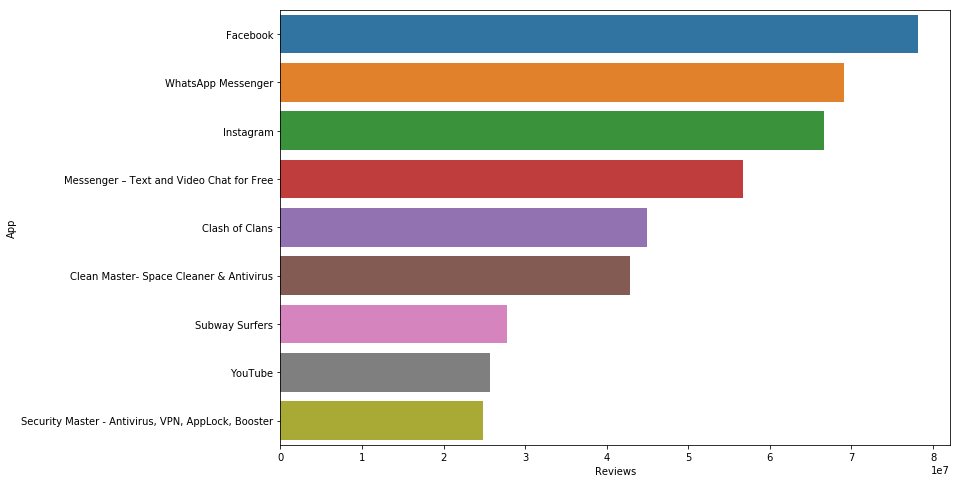

In [108]:
plt.figure(figsize=(12,8))
ax=sns.barplot(y='App',x='Reviews',data=gps_df.head(10))
plt.show()

**Categories in Google Playstore**

In [109]:
gps_df_categ=gps_df.groupby('Category')

In [110]:
gps_df_categ.count().shape

(33, 12)

In [111]:
gps_df_categcount=gps_df_categ.count()

**We have 33 distinct categories in GPS dataset**

In [112]:
gps_df_categcount.sort_values('App', ascending=False, inplace=True)

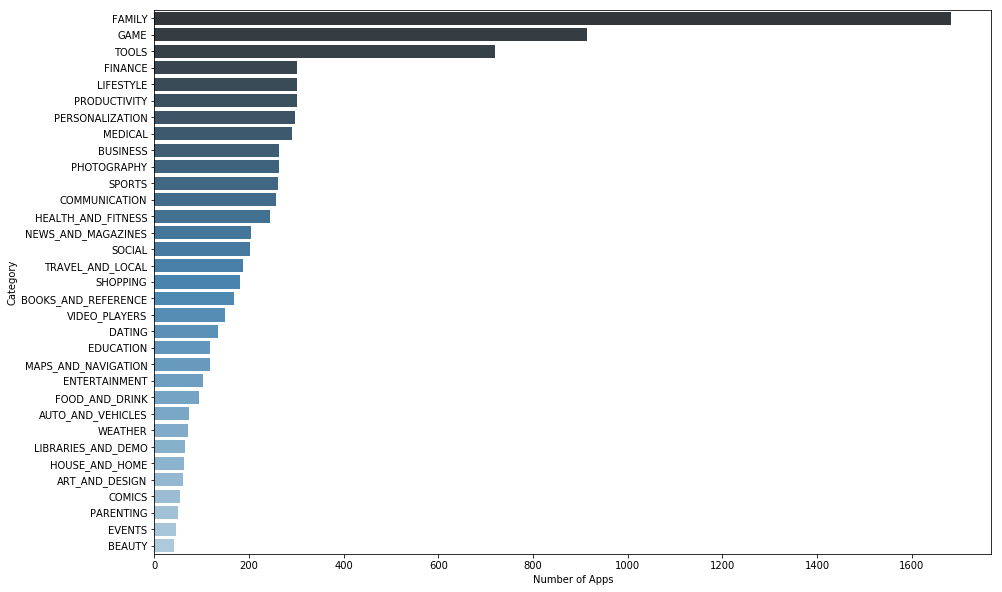

In [113]:

plt.figure(figsize=(15,10))
ax=sns.barplot(y=gps_df_categcount.index, x='App',data=gps_df_categcount, palette='Blues_d')
ax.set(xlabel='Number of Apps')
plt.show()

**Max no of apps are from the 'Family' category, Games and Tools taking 2nd and 3rd position.**

In [114]:
gps_df_type=gps_df.groupby(['Type','Category']).count()

In [115]:
gps_df_type.index.levels


FrozenList([['Free', 'Paid'], ['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FAMILY', 'FINANCE', 'FOOD_AND_DRINK', 'GAME', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES', 'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY', 'PRODUCTIVITY', 'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 'WEATHER']])

In [116]:
gps_df_type=gps_df_type.unstack(level=0)

In [117]:
#Some of the categories have no paid apps so filling NaN values with 0
gps_df_type=gps_df_type['App'].fillna(value=0,axis=1)

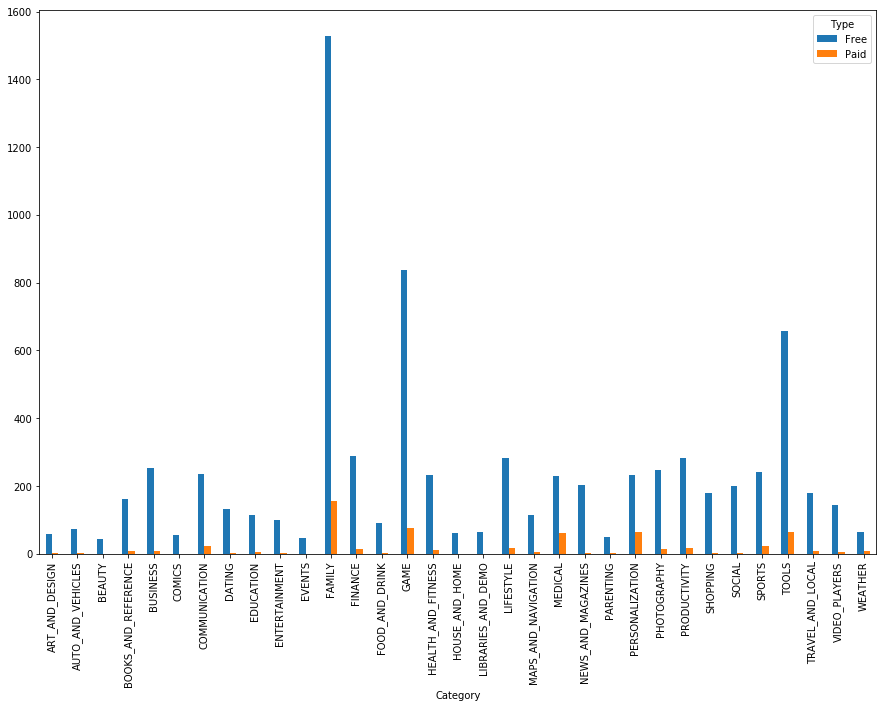

In [118]:
#Plotting the Type of Paid and free Apps
gps_df_type.plot(kind='bar',figsize=(15,10))


Category Family has max no of Free and Paid Apps 

## Plotting the features to predict rating

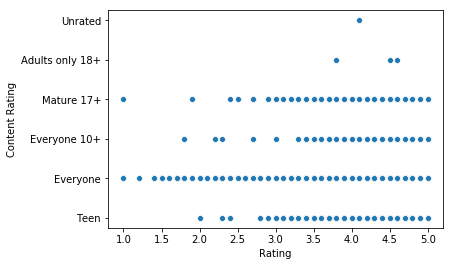

In [119]:
sns.scatterplot(x='Rating',y='Content Rating',data=gps_df)

In [120]:
#removing the unrated data
gps_df=gps_df[gps_df['Content Rating']!='Unrated']

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


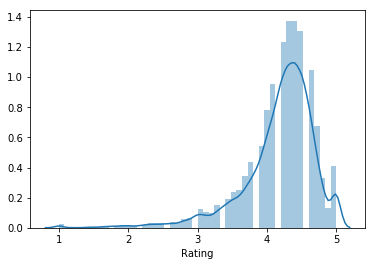

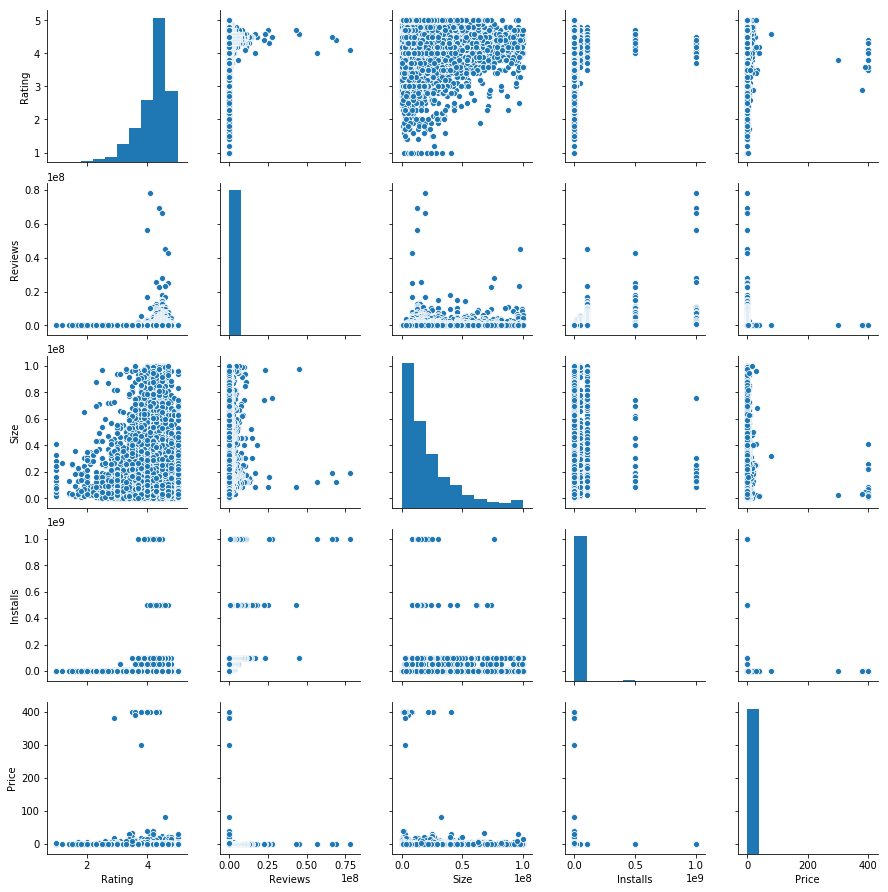

In [121]:

from pandas.plotting import scatter_matrix

sns.distplot(gps_df['Rating'], bins=50)
#gps_df.hist()
sns.pairplot(gps_df)
plt.show()

In [122]:
gps_df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.059453,0.063928,0.042392,-0.021330
Reviews,0.059453,1.000000,0.096379,0.611460,-0.008069
Size,0.063928,0.096379,1.000000,0.045452,-0.024808
Installs,0.042392,0.611460,0.045452,1.000000,-0.009849
Price,-0.021330,-0.008069,-0.024808,-0.009849,1.000000


Reviews and Installs are correlated. More downloaded apps have more reviews.

# Preprocessing Data

Lets predict the rating of an app using variables-
Reviews,Installs,Size,Price,Content Rating, Category

since content Rating and Category are categorical data. Using one hot encoding on it.

In [123]:
new_gps_df= gps_df[['Category','Reviews','Size','Installs','Price','Content Rating','Rating']]

Plots reveal that the dataset is skewed. For better predictions lets log transform the data.

In [124]:
#applying log to data

log_gps_df=np.log1p(new_gps_df[['Reviews','Size','Installs','Price','Rating']])

In [125]:
log_gps_df['Category']=new_gps_df[['Category']]

In [126]:
log_gps_df['Content Rating']=new_gps_df[['Content Rating']]

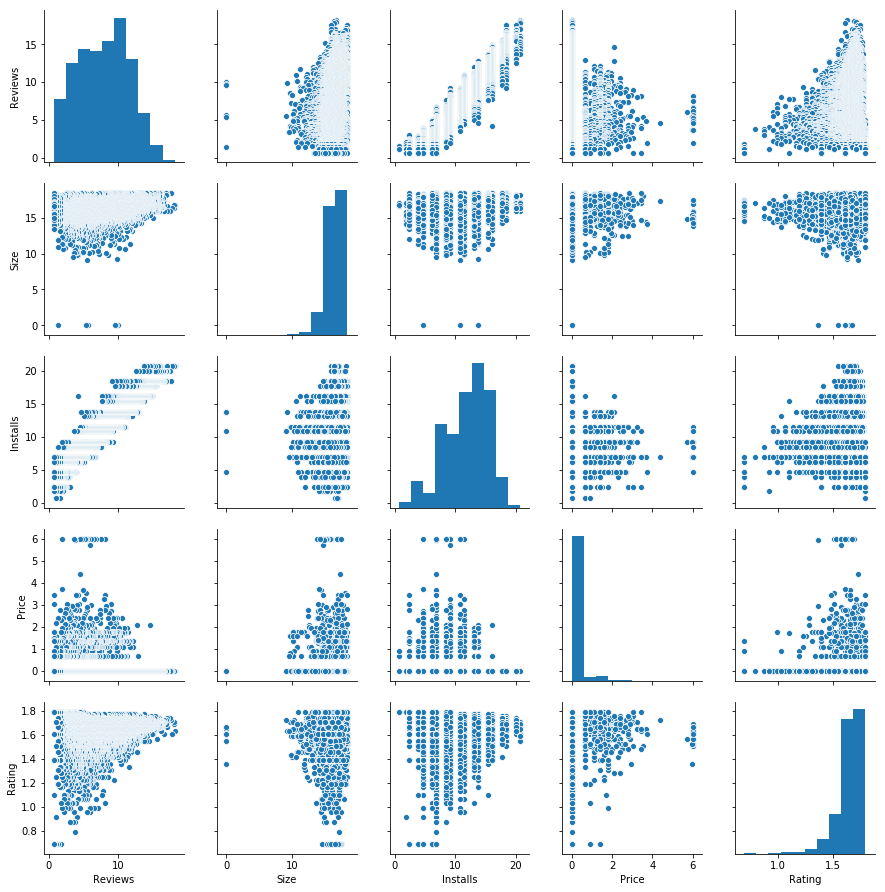

In [127]:
#plotting the tranformed data
sns.pairplot(log_gps_df)

In [128]:
log_gps_df.corr()

,Reviews,Size,Installs,Price,Rating
Reviews,1.000000,0.330065,0.952504,-0.142261,0.205488
Size,0.330065,1.000000,0.296842,-0.060553,0.081433
Installs,0.952504,0.296842,1.000000,-0.224739,0.118501
Price,-0.142261,-0.060553,-0.224739,1.000000,0.017834
Rating,0.205488,0.081433,0.118501,0.017834,1.000000


After log transformation ,the data appears to be much normal.
Reviews and Installs correlation is now stronger than before

# Predicting the Rating

In [129]:
from tempfile import mkdtemp
from shutil import rmtree
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.svm import SVR
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import statistics


    
numeric_features = ['Reviews','Installs','Size','Price']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['Content Rating','Category']
categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

column_trans = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

column_trans_cat = ColumnTransformer(
    transformers=[
        
        ('cat', categorical_transformer, categorical_features)],
        remainder='passthrough')



  ### Splitting the data and then using numeric + categorical transformer and then learning

In [130]:

    
clf = Pipeline(steps=[('preprocessor', column_trans),
                          ('classifier',Ridge(alpha=0.1, random_state=2)
                            )])


X = log_gps_df.drop(['Rating'], axis=1)
y = log_gps_df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf.fit(X_train, y_train)
y_test_pred=clf.predict(X_test)
Test_mse= mean_squared_error(y_test,y_test_pred)

cat_features=list(clf.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names())
coefficients=list(clf.named_steps['classifier'].coef_)
   
num_features=[]
num_features=['Reviews','Installs','Size','Price']
coefficients=list(clf.named_steps['classifier'].coef_)
cat_features.extend(num_features)

features_importance_1=[(cat_features, np.round(coefficients, 3)) for cat_features, coefficients in zip(cat_features, coefficients)]
coef_sum=0
    
print("Intercepts::",clf.named_steps['classifier'].intercept_)

print("Test MAE::", mean_absolute_error(y_test,y_test_pred))
print("Test MSE::",(Test_mse))

print("Test R^2 score::",(r2_score(y_test,y_test_pred)))
   
for pair in sorted(features_importance_1, key=lambda x: x[1]):
    coef_sum=coef_sum+pair[1]
    print(pair)
  
print("coef_sum::",coef_sum)

Intercepts:: 1.6370169011357583
Test MAE:: 0.07171424170997472
Test MSE:: 0.01288471195018529
Test R^2 score:: 0.13147575373582143
('x0_Everyone', -0.101)
('x1_FAMILY', -0.043)
('x1_PERSONALIZATION', -0.035)
('Size', -0.029)
('x1_EVENTS', -0.026)
('x1_FOOD_AND_DRINK', -0.025)
('Reviews', -0.023)
('x1_SPORTS', -0.02)
('x1_HOUSE_AND_HOME', -0.018)
('Installs', -0.017)
('x1_PARENTING', -0.012)
('x1_PRODUCTIVITY', -0.012)
('x1_EDUCATION', -0.011)
('x1_TOOLS', -0.01)
('x1_LIFESTYLE', -0.008)
('x1_WEATHER', -0.008)
('x1_LIBRARIES_AND_DEMO', -0.006)
('x1_AUTO_AND_VEHICLES', -0.005)
('x0_Mature 17+', -0.003)
('x1_VIDEO_PLAYERS', -0.003)
('Price', -0.003)
('x0_Everyone 10+', -0.002)
('x1_BEAUTY', -0.002)
('x1_HEALTH_AND_FITNESS', -0.002)
('x1_MAPS_AND_NAVIGATION', -0.002)
('x1_TRAVEL_AND_LOCAL', -0.001)
('x0_Teen', 0.001)
('x1_BOOKS_AND_REFERENCE', 0.003)
('x1_ENTERTAINMENT', 0.005)
('x1_ART_AND_DESIGN', 0.008)
('x1_MEDICAL', 0.008)
('x1_PHOTOGRAPHY', 0.008)
('x1_NEWS_AND_MAGAZINES', 0.015)
('x

### Using first categorical transformer on whole data and then splitting into train test data for Scaling + Learning

In [131]:
clf_new=Pipeline(steps=[('scaler', StandardScaler(with_mean=False)),
                           ('classifier',Ridge(alpha=0.1, random_state=2))
                            ])

X = log_gps_df.drop(['Rating'], axis=1)
y = log_gps_df['Rating']
                            
X_transformed=column_trans_cat.fit_transform(X)
print("X_transformed::",X_transformed.shape)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

   
clf_new.fit(X_train, y_train)
y_test_pred=clf_new.predict(X_test)
Test_mse= mean_squared_error(y_test,y_test_pred)
    
    
cat_features=list(column_trans_cat.named_transformers_['cat'].named_steps['onehot'].get_feature_names())
    #Category_features=list(clf.named_steps['preprocessor'].named_transformers_['cat'])
num_features=[]
num_features=['Reviews','Installs','Size','Price']

coefficients=list(clf_new.named_steps['classifier'].coef_)
cat_features.extend(num_features)

features_importance_2=[(cat_features, np.round(coefficients, 3)) for cat_features, coefficients in zip(cat_features, coefficients)]
coef_sum=0
    

    
print("Intercepts::",clf_new.named_steps['classifier'].intercept_)


print("Test MAE::", mean_absolute_error(y_test,y_test_pred))
print("Test MSE::",(Test_mse))

print("Test R^2 score::",r2_score(y_test,y_test_pred))
   
for pair in sorted(features_importance_2, key=lambda x: x[1]):
    coef_sum=coef_sum+pair[1]
    print(pair)
 
print("coef_sum::",coef_sum)

X_transformed:: (8279, 42)
Intercepts:: 1.6371473935285563
Test MAE:: 0.07168156527777882
Test MSE:: 0.012882969306797136
Test R^2 score:: 0.13159322070295687
('Size', -0.1)
('Price', -0.003)
('x1_DATING', -0.002)
('x1_MAPS_AND_NAVIGATION', -0.001)
('x1_VIDEO_PLAYERS', -0.001)
('Installs', -0.001)
('x1_COMMUNICATION', -0.0)
('x1_ENTERTAINMENT', -0.0)
('x0_Adults only 18+', 0.001)
('x1_FINANCE', 0.001)
('x1_PHOTOGRAPHY', 0.001)
('x1_TOOLS', 0.001)
('x1_TRAVEL_AND_LOCAL', 0.001)
('x1_BUSINESS', 0.002)
('x1_COMICS', 0.002)
('x1_FOOD_AND_DRINK', 0.002)
('x1_LIFESTYLE', 0.002)
('x1_NEWS_AND_MAGAZINES', 0.002)
('x1_WEATHER', 0.002)
('x1_HOUSE_AND_HOME', 0.003)
('x1_PRODUCTIVITY', 0.003)
('x1_SHOPPING', 0.003)
('x1_SOCIAL', 0.003)
('x1_SPORTS', 0.003)
('x1_AUTO_AND_VEHICLES', 0.004)
('x1_BEAUTY', 0.004)
('x1_HEALTH_AND_FITNESS', 0.004)
('x1_LIBRARIES_AND_DEMO', 0.004)
('x1_EVENTS', 0.005)
('x1_GAME', 0.005)
('x1_PARENTING', 0.005)
('x1_EDUCATION', 0.006)
('x1_MEDICAL', 0.006)
('x1_ART_AND_DES

In [132]:
def plotting_feature_importances(features_importance,title):
    plt.figure(figsize=(30,15))

    for pair in sorted(features_importance, key=lambda x: x[1]):
            plt.barh(pair[0],pair[1])

    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.xlabel("Features", fontsize=18)
    plt.ylabel("Importance",fontsize=18)
    plt.title(title,  fontsize=20)
    plt.show()

### Comparing their results

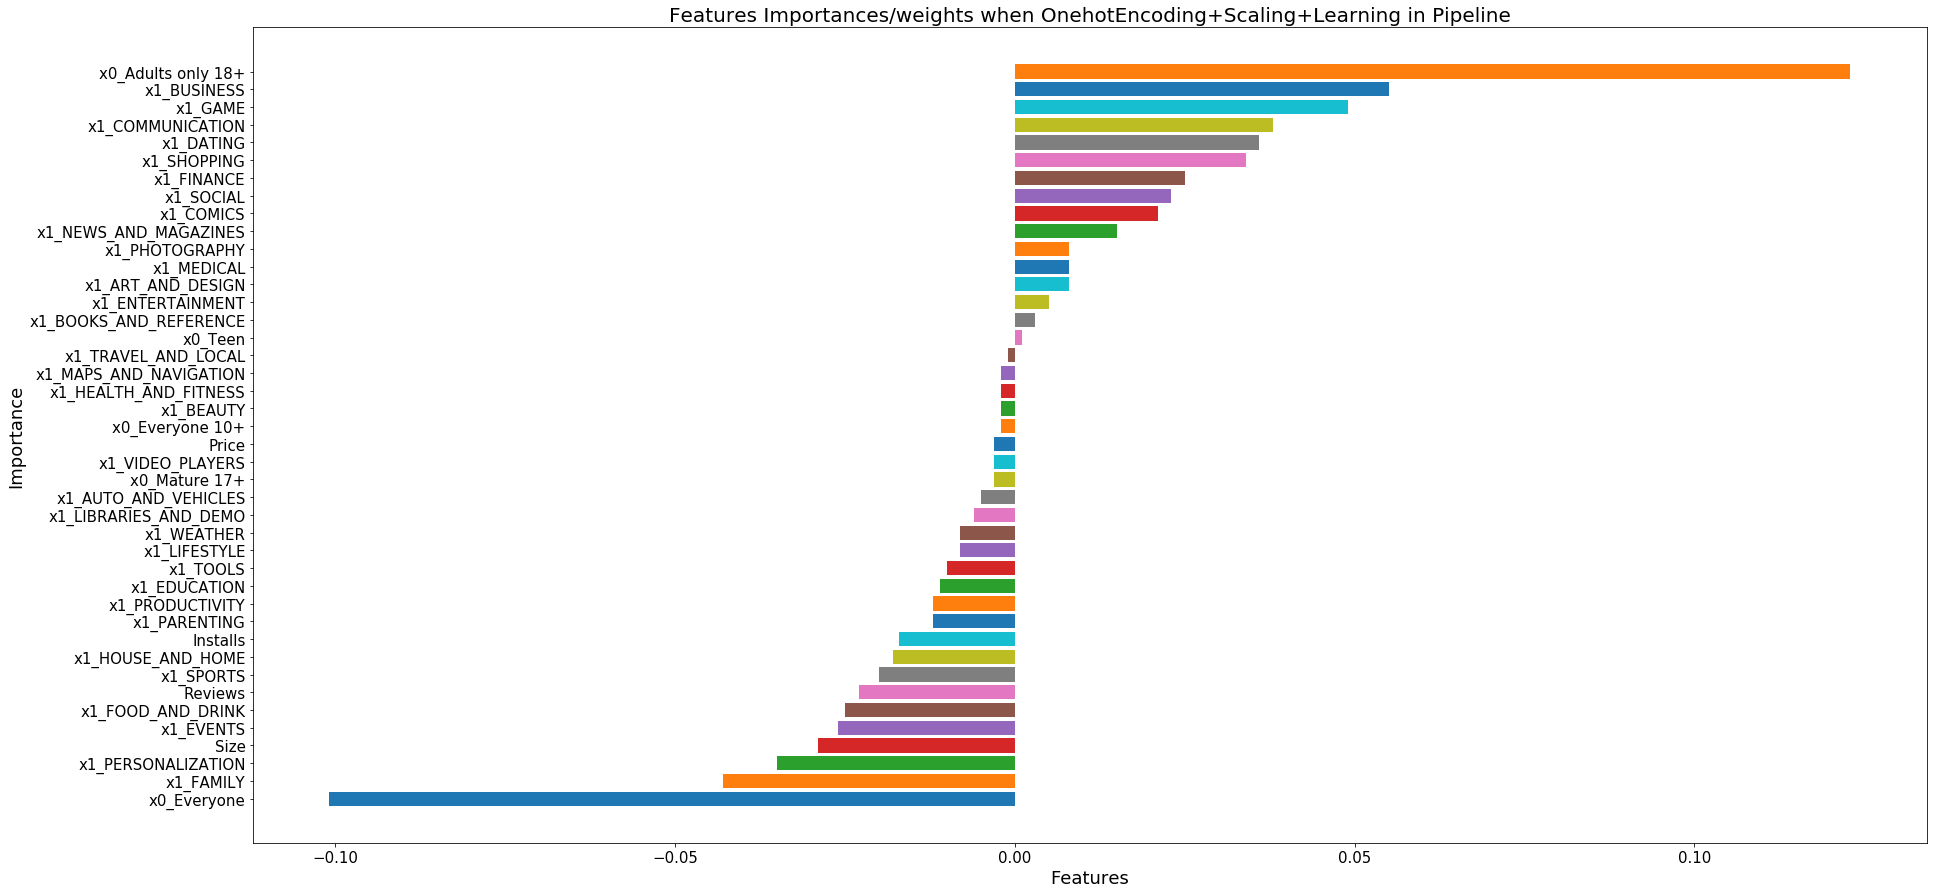

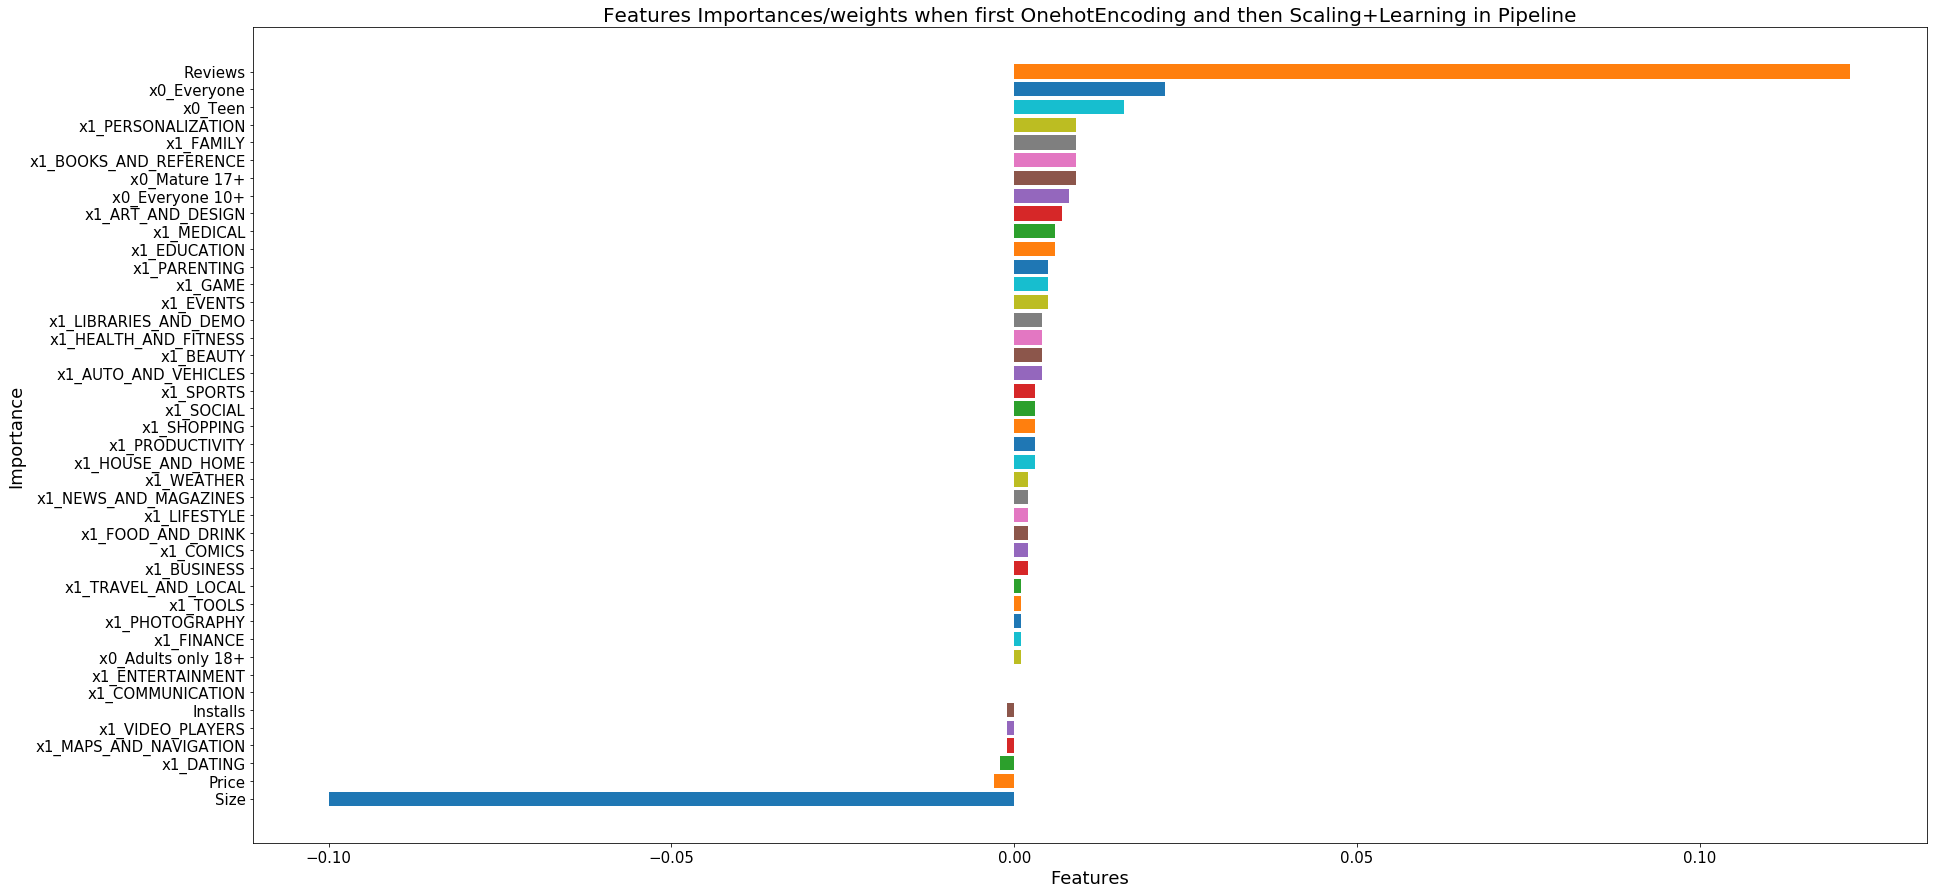

In [133]:

plotting_feature_importances(features_importance_1, "Features Importances/weights when OnehotEncoding+Scaling+Learning in Pipeline")

plotting_feature_importances(features_importance_2, "Features Importances/weights when first OnehotEncoding and then Scaling+Learning in Pipeline")

### Conclusion

From the above results we can see that both of them give similar MSE and R^2 score but the coeffiecients weights/importances differ.

Low R^2 score also suggests that the predictor variables contribute less for predictng the best response. 

I would say that if only prediction accuracy/MSE required then it doesn't matter how you go but if the weights/importances are also required then the 2nd method that is first using onehotencoding on whole dataset and then scaling+Learning gives much accurate result.

#### Reviews get the highest weight followed by Category Everyone.
